In [1]:
import json
import os
import glob
import shutil

# 画像関係
import numpy as np
import cv2
from PIL import Image

# 画像表示
import matplotlib.pyplot as plt

IMAGE_SIZE = 256

# データの確認

In [2]:
# データのリスト
json_list = glob.glob('seg_dogs/*.json')
img_list = [f.replace('json', 'jpg') for f in json_list]
print(len(json_list))

114


In [3]:
no = 1

# アノテーションデータ読み込み
with open(json_list[no]) as f:
    data = json.loads(f.read())
    
# 1つだけ取り出す
shape = data['shapes'][0]
label = shape['label']
points = shape['points']
shape_type = shape['shape_type']
print('[label]', label)
print('[shape_type]', shape_type)
print('[points]', points)

[label] dog
[shape_type] polygon
[points] [[100.76335877862596, 195.42748091603053], [64.8854961832061, 183.21374045801525], [49.61832061068702, 172.5267175572519], [100.0, 143.51908396946564], [137.40458015267174, 112.22137404580153], [174.04580152671755, 77.87022900763358], [190.83969465648855, 106.1145038167939], [185.49618320610685, 123.67175572519082], [204.5801526717557, 141.99236641221373], [227.48091603053433, 151.15267175572518], [285.4961832061069, 141.22900763358777], [344.2748091603053, 128.25190839694656], [363.3587786259542, 115.27480916030532], [351.14503816793894, 103.06106870229007], [364.8854961832061, 79.3969465648855], [380.1526717557252, 78.63358778625954], [400.0, 58.786259541984734], [429.00763358778624, 70.23664122137404], [458.0152671755725, 86.26717557251908], [477.09923664122135, 84.74045801526717], [499.23664122137404, 69.47328244274809], [522.9007633587786, 62.603053435114504], [517.5572519083969, 80.9236641221374], [507.6335877862595, 96.19083969465649], [

# データの変換

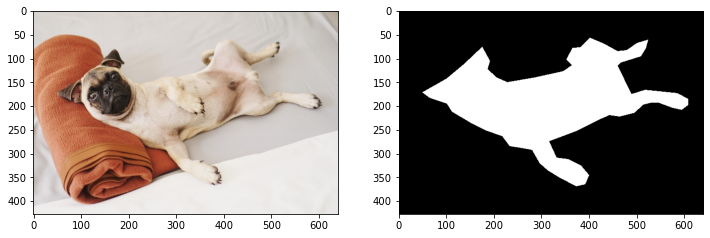

In [4]:
# 画像読み込み
img = cv2.imread(img_list[no])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# アノテーション部分
mask = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
mask = cv2.fillPoly(mask, np.int32([points]), 1)

# 横並びに表示
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.imshow(img)
ax2.imshow(mask, cmap='gray')

# データの保存

In [5]:
# フォルダ作成 trainとvalにデータを分けます
train_dir = 'train'
val_dir = 'val'
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
    os.mkdir(train_dir + '/images')
    os.mkdir(train_dir + '/masks')
if not os.path.exists(val_dir):
    os.mkdir(val_dir)
    os.mkdir(val_dir + '/images')
    os.mkdir(val_dir + '/masks')

In [6]:
# 114個のデータを用意したので 100 と 14 に分けます
for ind, file in enumerate(json_list):
    points = []
    with open(file) as f:
        data = json.loads(f.read())
        for s in data['shapes']:
            points.append(s['points'])
    
    if points:
        # 画像データを読み込み画像サイズ取得
        img_path = file.replace('json', 'jpg')
        img = cv2.imread(img_path)

        # ファイル名
        file_name = os.path.basename(img_path)

        # jsonのアノテーションデータ
        # 犬：1
        # 背景：0
        mask = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
        for p in points:
            mask = cv2.fillPoly(mask, np.int32([p]), 1)

        # リサイズ
        img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE), interpolation=cv2.INTER_NEAREST)
        mask = cv2.resize(mask, (IMAGE_SIZE, IMAGE_SIZE), interpolation=cv2.INTER_NEAREST)

        # 保存
        file_name = file_name.replace('jpg', 'png')
        if ind<100:
            maskim = Image.fromarray(np.uint8(mask))
            maskim.save(f'train/masks/{file_name}')
            cv2.imwrite(f'train/images/{file_name}', img)
        else:
            maskim = Image.fromarray(np.uint8(mask))
            maskim.save(f'val/masks/{file_name}')
            cv2.imwrite(f'val/images/{file_name}', img)
    